https://github.com/mardani72/Facies-Classification-Machine-Learning/blob/master/Facies_Classification_Various_ML_Final.ipynb

* **GR**: this wireline logging tools measure gamma emission from formation. Good index for shale content
* **ILD_LOG10**: this is resistivity measurment which is applicable for identification of reservoir fluid content
* **PE**: photoelectric effect log can be used for lithology (mineral contet of rock) identificaiton
* **DPHI**: Phi is porosity index in petrophysics. To measure porosity, there serval methods such as neutron and density. This is differences between them
* **PNHIND**: Average of neutron and density log
* **NM_M**:nonmarine-marine indicator
* **RELPOS**: relative position

Description of 9 discrete facies
1. **(SS)** Nonmarine sandstone
2. **(CSiS)** Nonmarine coarse siltstone
3. **(FSiS)** Nonmarine fine siltstone
4. **(SiSH)** Marine siltstone and shale
5. **(MS)** Mudstone (limestone)
6. **(WS)** Wackestone (limestone)
7. **(D)** Dolomite
8. **(PS)** Packstone-grainstone (limestone)
9. **(BS)** Phylloid-algal bafflestone (limestone)

## Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ikiearth/FACIES-CLASIFICATION/main/facies_vectors.csv')
dataset

,FACIES,FORMATION,WELL,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [4]:
dataset.describe()

,FACIES,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [5]:
dataset['NM_M'].value_counts()

2    2151
1    1998
Name: NM_M, dtype: int64

Change into categorical data

In [6]:
dataset['WELL'] = dataset['WELL'].astype('category')
dataset['FORMATION'] = dataset['FORMATION'].astype('category')
# dataset['FACIES'] = dataset['FACIES'].astype('category')

dataset.dtypes

FACIES          int64
FORMATION    category
WELL         category
DEPTH         float64
GR            float64
ILD_LOG10     float64
DPHI          float64
PHIND         float64
PE            float64
NM_M            int64
RELPOS        float64
dtype: object

Remove data points that don't have a valid PE entry

In [7]:
PE_mask = dataset['PE'].notnull().values
dataset = dataset[PE_mask]

In [8]:
dataset.describe()

,FACIES,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


Remove a single well (named NOLAN) to use as blind test later

In [9]:
blind_dataset = dataset[dataset['WELL'] == 'NOLAN']
training_dataset = dataset[dataset['WELL'] != 'NOLAN']
training_dataset['WELL'].value_counts()

CROSS H CATTLE     501
SHRIMPLIN          471
NEWBY              463
LUKE G U           461
SHANKLE            449
CHURCHMAN BIBLE    404
Recruit F9          68
ALEXANDER D          0
KIMZEY A             0
NOLAN                0
Name: WELL, dtype: int64

Plot log data for different well

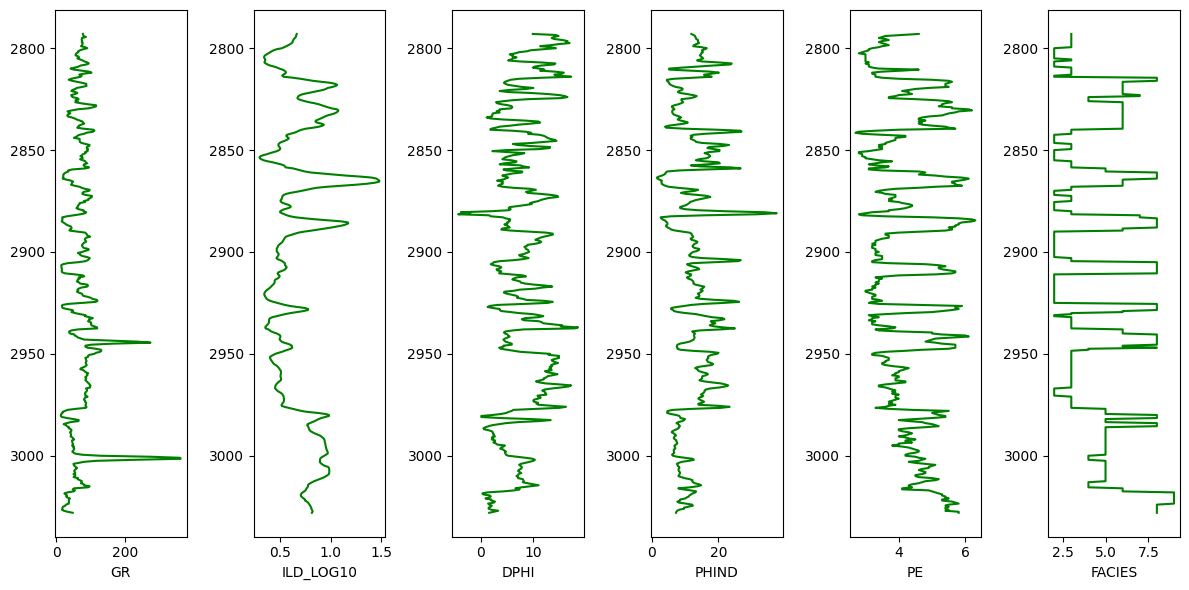

In [10]:
figure, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
logs = training_dataset[training_dataset['WELL'] == 'SHRIMPLIN'].sort_values(by='DEPTH')
features = ['GR', 'ILD_LOG10', 'DPHI', 'PHIND', 'PE', 'FACIES']
for i in range(len(features)):
  ax[i].plot(getattr(logs, features[i]), logs.DEPTH, '-g')
  ax[i].invert_yaxis()
  ax[i].set_xlabel(features[i])
plt.tight_layout()

# ax[5].plot(logs.FACIES, logs.DEPTH)
# color = cmap(index_value)
# ax[5].fill_betweenx(logs.DEPTH, logs.FACIES, color=color)
# # cluster = np.repeat(np.expand_dims(logs['FACIES'].values, 1), 100, 1)
# # im = ax[5].imshow(cluster, interpolation='none', cmap='Set1', aspect='auto')
# # cbar = plt.colorbar(im)
# # cbar.set_label(np.arange(1, 10, 1))
# # cluster

<Axes: >

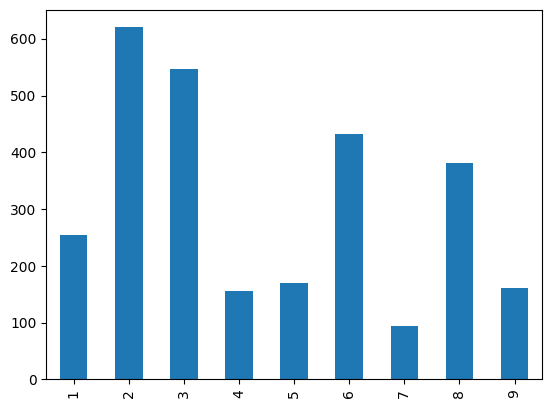

In [11]:
facies_counts = training_dataset['FACIES'].value_counts().sort_index()
facies_counts.plot(kind='bar')

Pair plot for wireline data reading

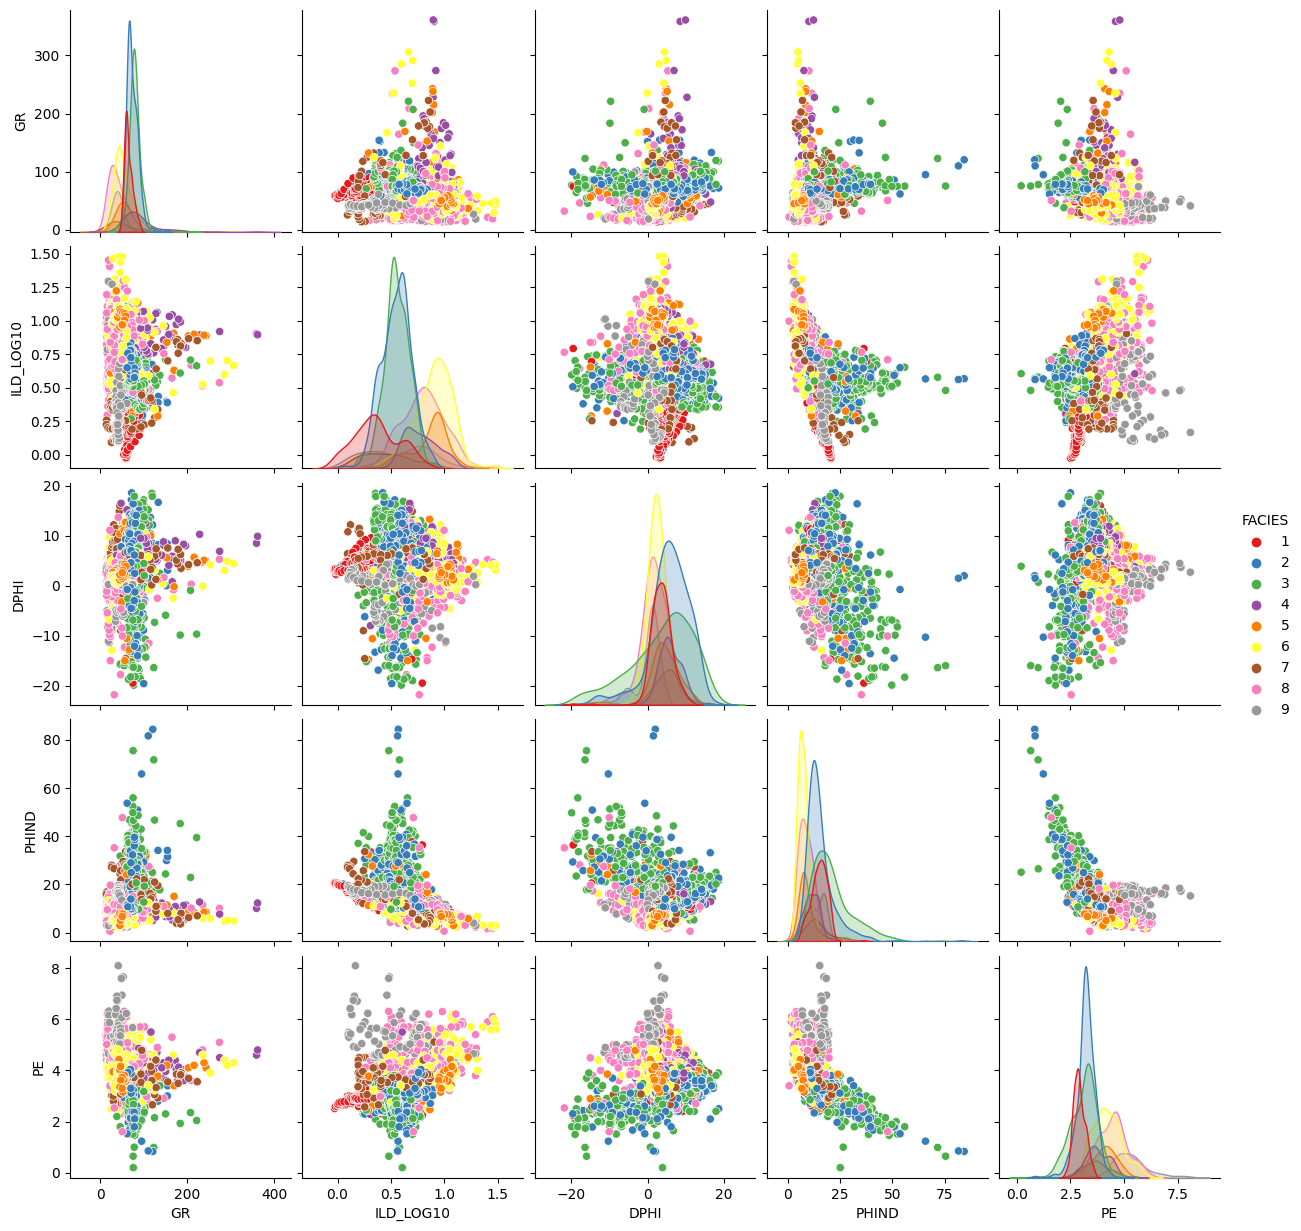

In [12]:
training_dataset.columns
dummy = training_dataset.drop(['WELL', 'FORMATION', 'DEPTH', 'RELPOS', 'NM_M'], axis=1)
sns.pairplot(dummy, hue='FACIES', palette='Set1')

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_84196/2043767762.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(training_dataset.corr(), annot=True)


<Axes: >

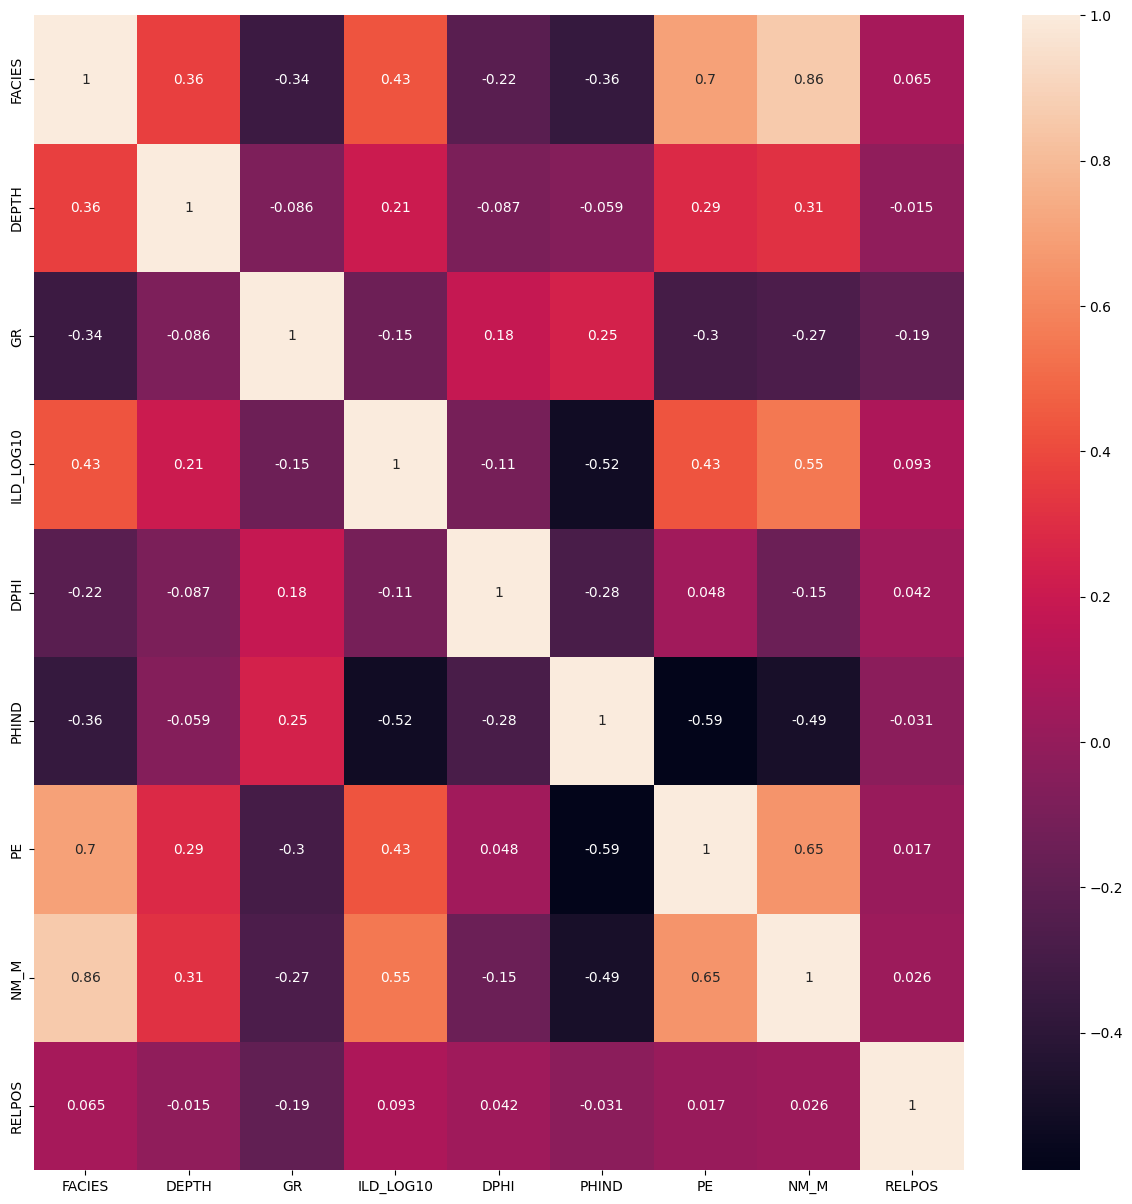

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(training_dataset.corr(), annot=True)

Split into matrix feature and facies label

In [14]:
X = training_dataset.drop(['FORMATION', 'WELL', 'DEPTH', 'FACIES'], axis=1)
y = training_dataset['FACIES']

Data splitting

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## K-nearest Neighbors

### Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_distributions = {'n_neighbors': np.arange(3, 15, 3),
                       'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), 
                           param_distributions, 
                           scoring='accuracy', cv=10)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  6,  9, 12]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [18]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [19]:
pd.DataFrame(grid_search.cv_results_).transpose()

,0,1,2,3,4,5,6,7
mean_fit_time,0.00103,0.00071,0.000634,0.000616,0.000645,0.000664,0.000675,0.000706
std_fit_time,0.000186,0.000043,0.000018,0.000017,0.000055,0.000074,0.000054,0.000077
mean_score_time,0.004152,0.001439,0.003011,0.001565,0.00324,0.001997,0.003593,0.002311
std_score_time,0.000789,0.000106,0.000109,0.000091,0.000144,0.000251,0.000224,0.000178
param_n_neighbors,3,3,6,6,9,9,12,12
param_weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'n_neighbors': 3, 'weights': 'uniform'}","{'n_neighbors': 3, 'weights': 'distance'}","{'n_neighbors': 6, 'weights': 'uniform'}","{'n_neighbors': 6, 'weights': 'distance'}","{'n_neighbors': 9, 'weights': 'uniform'}","{'n_neighbors': 9, 'weights': 'distance'}","{'n_neighbors': 12, 'weights': 'uniform'}","{'n_neighbors': 12, 'weights': 'distance'}"
split0_test_score,0.712389,0.730088,0.659292,0.725664,0.641593,0.721239,0.610619,0.690265
split1_test_score,0.672566,0.707965,0.650442,0.69469,0.646018,0.699115,0.646018,0.699115
split2_test_score,0.725664,0.761062,0.690265,0.743363,0.668142,0.725664,0.628319,0.712389


### Model Evaluation on Test Set

In [20]:
knn = grid_search.best_estimator_
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

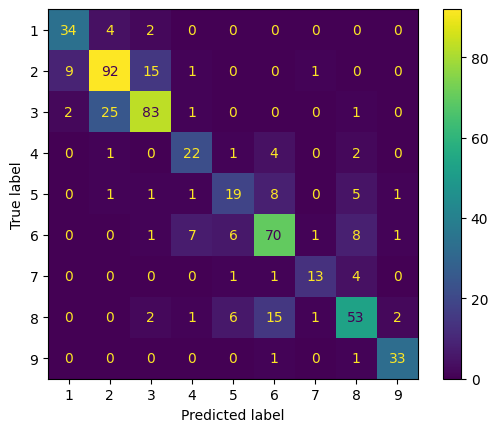

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_).plot()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.85      0.80        40
           2       0.75      0.78      0.76       118
           3       0.80      0.74      0.77       112
           4       0.67      0.73      0.70        30
           5       0.58      0.53      0.55        36
           6       0.71      0.74      0.73        94
           7       0.81      0.68      0.74        19
           8       0.72      0.66      0.69        80
           9       0.89      0.94      0.92        35

    accuracy                           0.74       564
   macro avg       0.74      0.74      0.74       564
weighted avg       0.74      0.74      0.74       564



## Random Forest Classifier

### Hyperparameter Tuning

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

param_distributions = {'n_estimators': sp_randint(100, 500),
                       'max_depth': sp_randint(3, 7),
                       'max_features': sp_randint(1, 7)}
search = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions, 
                           scoring='accuracy', cv=10)
search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x175dad630>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x175dae3e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x175c47880>},
                   scoring='accuracy')

In [24]:
search.best_params_

{'max_depth': 6, 'max_features': 6, 'n_estimators': 395}

In [25]:
pd.DataFrame(search.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.683885,0.371302,0.460004,1.091025,0.386475,0.428429,0.518816,0.316546,1.136804,0.28423
std_fit_time,0.013233,0.008543,0.016695,0.089498,0.008249,0.044535,0.016942,0.010706,0.01297,0.004431
mean_score_time,0.011585,0.013822,0.01182,0.014043,0.014551,0.012763,0.01391,0.005571,0.014649,0.011541
std_score_time,0.00032,0.000535,0.000258,0.000991,0.00063,0.000333,0.000723,0.00017,0.000732,0.000411
param_max_depth,3,5,3,6,5,3,6,6,6,3
param_max_features,6,1,3,6,1,2,2,4,6,1
param_n_estimators,387,398,386,355,414,416,368,145,395,366
params,"{'max_depth': 3, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 1, 'n_estimat...","{'max_depth': 3, 'max_features': 3, 'n_estimat...","{'max_depth': 6, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 1, 'n_estimat...","{'max_depth': 3, 'max_features': 2, 'n_estimat...","{'max_depth': 6, 'max_features': 2, 'n_estimat...","{'max_depth': 6, 'max_features': 4, 'n_estimat...","{'max_depth': 6, 'max_features': 6, 'n_estimat...","{'max_depth': 3, 'max_features': 1, 'n_estimat..."
split0_test_score,0.588496,0.632743,0.575221,0.668142,0.641593,0.575221,0.659292,0.676991,0.668142,0.566372
split1_test_score,0.548673,0.579646,0.548673,0.641593,0.597345,0.566372,0.641593,0.623894,0.646018,0.535398


### Model Evaluation on Test Set

In [26]:
rf = search.best_estimator_
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

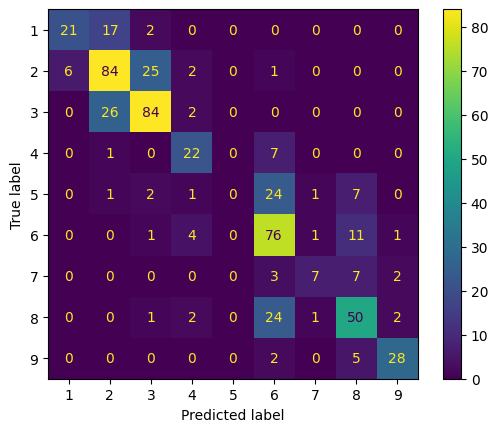

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_).plot()

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.53      0.63        40
           2       0.65      0.71      0.68       118
           3       0.73      0.75      0.74       112
           4       0.67      0.73      0.70        30
           5       0.00      0.00      0.00        36
           6       0.55      0.81      0.66        94
           7       0.70      0.37      0.48        19
           8       0.62      0.62      0.62        80
           9       0.85      0.80      0.82        35

    accuracy                           0.66       564
   macro avg       0.62      0.59      0.59       564
weighted avg       0.63      0.66      0.64       564



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

## Support Vector Machine

### Hyperparameter Tuning

In [29]:
# from sklearn.svm import SVC

# param_distributions = {'kernel': np.arange(3, 15, 3),
#                        'weights': ['uniform', 'distance']}
# grid_search = GridSearchCV(KNeighborsClassifier(), 
#                            param_distributions, 
#                            scoring='accuracy', cv=10)
# grid_search.fit(X_train_scaled, y_train)

## Evaluation on Blind Set

In [30]:
y_blind = blind_dataset['FACIES']
X_blind = blind_dataset.drop(['FORMATION', 'WELL', 'DEPTH', 'FACIES'], axis=1)
X_blind_scaled = scaler.transform(X_blind)

In [31]:
y_blind_knn = knn.predict(X_blind_scaled)
y_blind_rf = rf.predict(X_blind_scaled)

### K-nearest Neighbors

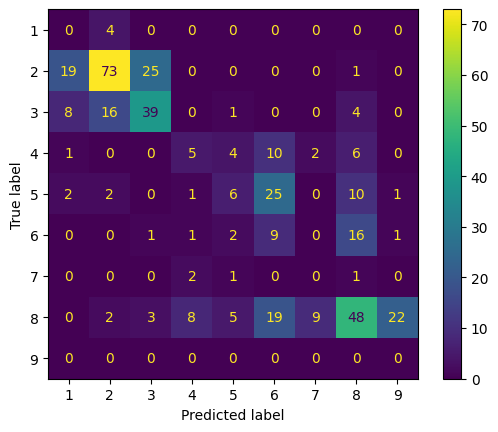

In [32]:
cm = confusion_matrix(y_blind, y_blind_knn)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_).plot()

In [33]:
print(classification_report(y_blind, y_blind_knn))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.75      0.62      0.68       118
           3       0.57      0.57      0.57        68
           4       0.29      0.18      0.22        28
           5       0.32      0.13      0.18        47
           6       0.14      0.30      0.19        30
           7       0.00      0.00      0.00         4
           8       0.56      0.41      0.48       116
           9       0.00      0.00      0.00         0

    accuracy                           0.43       415
   macro avg       0.29      0.25      0.26       415
weighted avg       0.53      0.43      0.47       415



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

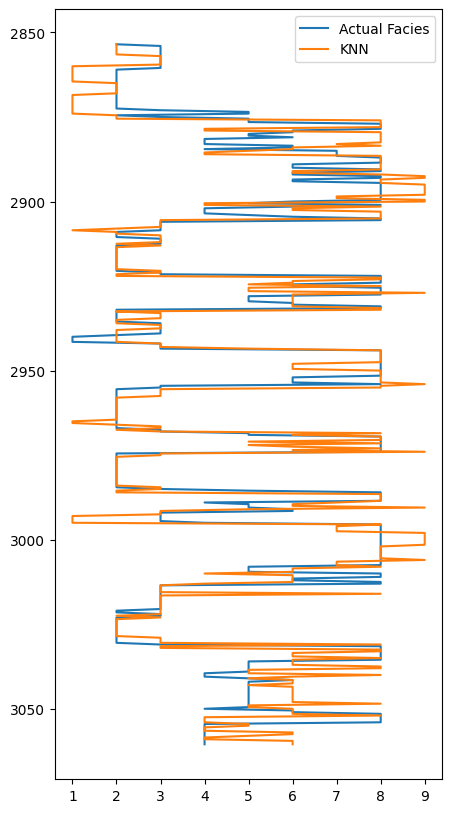

In [34]:
figure, ax = plt.subplots(figsize=(5,10))
logs = blind_dataset.sort_values(by='DEPTH')
ax.plot(logs.FACIES, logs.DEPTH, label='Actual Facies')
ax.plot(y_blind_knn, logs.DEPTH, label='KNN')
ax.invert_yaxis()
ax.legend()

Description of 9 discrete facies
1. **(SS)** Nonmarine sandstone
2. **(CSiS)** Nonmarine coarse siltstone
3. **(FSiS)** Nonmarine fine siltstone
4. **(SiSH)** Marine siltstone and shale
5. **(MS)** Mudstone (limestone)
6. **(WS)** Wackestone (limestone)
7. **(D)** Dolomite
8. **(PS)** Packstone-grainstone (limestone)
9. **(BS)** Phylloid-algal bafflestone (limestone)

### Random Forest Classifier

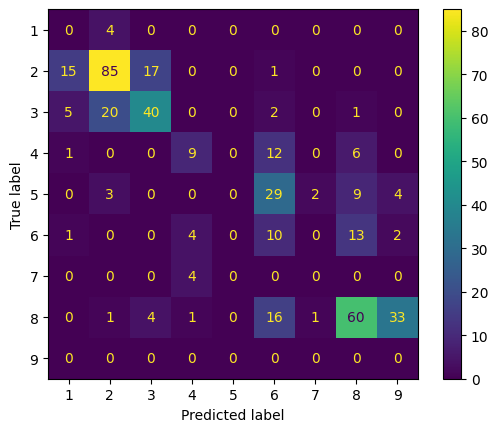

In [35]:
cm = confusion_matrix(y_blind, y_blind_rf)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_).plot()

In [36]:
print(classification_report(y_blind, y_blind_rf))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.75      0.72      0.74       118
           3       0.66      0.59      0.62        68
           4       0.50      0.32      0.39        28
           5       0.00      0.00      0.00        47
           6       0.14      0.33      0.20        30
           7       0.00      0.00      0.00         4
           8       0.67      0.52      0.59       116
           9       0.00      0.00      0.00         0

    accuracy                           0.49       415
   macro avg       0.30      0.28      0.28       415
weighted avg       0.55      0.49      0.52       415



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

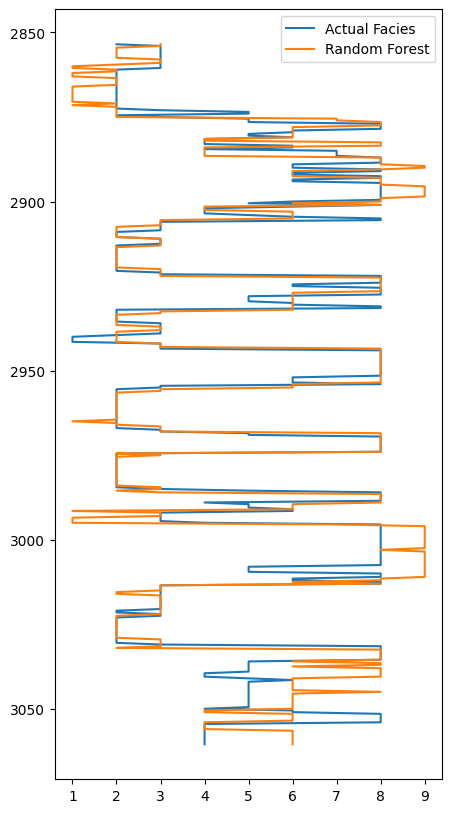

In [37]:
figure, ax = plt.subplots(figsize=(5,10))
logs = blind_dataset.sort_values(by='DEPTH')
ax.plot(logs.FACIES, logs.DEPTH, label='Actual Facies')
ax.plot(y_blind_rf, logs.DEPTH, label='Random Forest')
ax.invert_yaxis()
ax.legend()